In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize
import json
import matplotlib

## Segédfüggvények

In [2]:
# determines if n is probably-prime or composite using miller rabin test. Tests k times
def is_prime(n, k=20): # miller-rabin test
    if n == 2:
        return True
    for _ in range(k):
        witness = 1
        a = random.randint(2, n-1)
        if gcd(a, n)[1] != 1:
            return False
        d = n-1
        r = 0
        while d % 2 == 0:
            d = d//2
            r += 1
        s = int_pow_mod(a, d, n)
        if s == 1:
            witness = 0
        for i in range(r):
            if s == n-1:
                witness = 0
            s = s**2 % n
        if witness == 1:
            return False
    return True

def gcd(m, n): # euclid's algorithm
    a = max(m,n)
    b = min(m,n)
    if a%b == 0:
        return a, b
    c = a % b
    return gcd(b, c) # c a legnagyobb közös osztó

In [3]:
def int_nth_root(A, n): # calculate floor of nth root of A
    if A<0:
        if n%2 == 0:
            raise ValueError
        return -int_nth_root(-A,n)
    if A==0:
        return 0
    n1 = n-1
    if A.bit_length() < 1024: # float(n) safe from overflow
        xk = int( round( pow(A,1.0/n) ) )
        xk = ( n1*xk + A//pow(xk,n1) )//n # Ensure xk >= floor(nthroot(A)).
    else:
        xk = 1 << -(-A.bit_length()//n) # 1 << sum(divmod(A.bit_length(),n))
                                        # power of 2 closer but greater than the nth root of A
    while True:
        d = A // pow(xk,n1)
        if xk <= d:
            return xk
        xk = (n1*xk + d)//n

In [4]:
def two_pow(A, k): # computes A**(2**k), A: L bit int
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 
    return result  # if k < L: max O(L^3) operations

def int_pow(A, n): # computes A**n in polynomal time, A: L bit int
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow(A, i)
    return result # if n < A: max O(L^4) operations


In [5]:
def two_pow_mod(A, k, N): #computes A**(2**k) mod N, A: L bit int
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 % N
    return result  # if  k < L: max O(L^3)

def int_pow_mod(A, n, N): #computes A**n mod N in polynomal time, A: L bit integer
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow_mod(A, i, N) % N
    return result # if n < A:max O(L^4) operations

In [6]:
def find_int_pow(N):
    n = N.bit_length()
    for i in range(2, n):
        a = int_nth_root(N, i)
        if int_pow(a, i) == N:
            return a, i
    return N, 1

def order(a, N): 
    if gcd(a, N)[1] != 1:
        raise ValueError("a and N have to be coprime")
    s = 1
    i = 0
    while i == 0 or s != 1:
        s = (a*s) % N
        i += 1
    return i

In [7]:
def phi(N):
    i = 0
    for a in range(1, N):
        if gcd(a, N)[1] == 1:
            i += 1
    return i

In [8]:
l = []
x = np.arange(3, 30)
for i in x:
    l.append(i/phi(i))

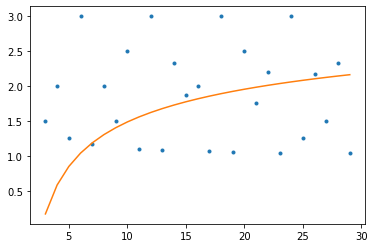

In [9]:
plt.plot(x, l, '.')
plt.plot(x, np.exp(np.euler_gamma)*np.log(np.log(x)))

## Kapuk száma, mélység

In [10]:
def dep(n):
    return 232*n**3+282*n**2+32*n

def cx(n):
    return 16*n**4+152*n**3+188*n**2+104*n

def sing(n):
    return 24*n**4 + 176*n**3 + 230*n**2 + 139*n

In [11]:
file1 = open("complexity.txt", "r")
compl1 = json.load(file1)
file1.close()

In [12]:
file2 = open("complexity2.txt", "r")
compl2 = json.load(file2)
file2.close()

In [13]:
file3 = open("complexity3.txt", "r")
compl = json.load(file3)
file3.close()

In [14]:
np.array(list(compl2['depth'].keys()), dtype=int)

array([ 15,  21,  33,  35,  39,  45,  51,  55,  57,  63,  65,  69,  75,
        77,  85,  87,  91,  93,  95,  99, 105, 111, 115, 117, 119, 123,
       129, 133, 135, 141, 143, 145, 147, 153, 155, 159, 161, 165, 171,
       175, 177, 183, 185, 187, 189, 195, 201, 203, 205, 207, 209, 213,
       215, 217, 219, 221, 231, 235, 237, 245, 247, 249, 253, 255])

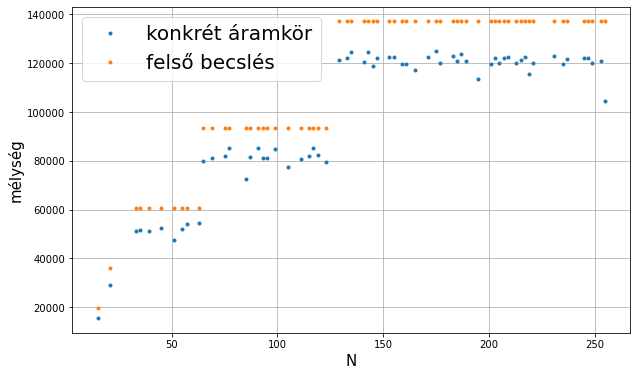

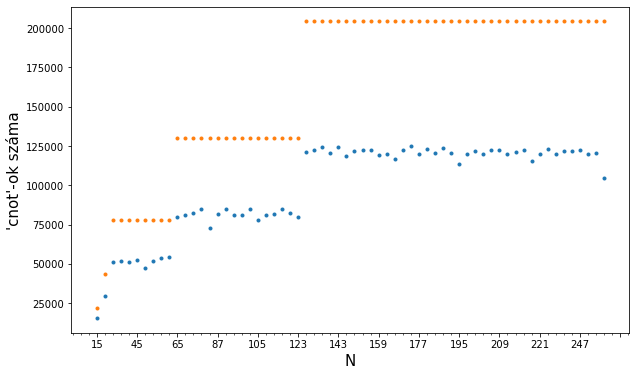

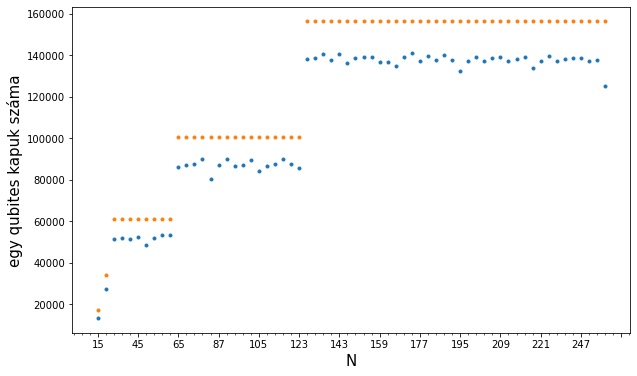

In [27]:
N_max = max(np.array(list(compl2['depth'].keys()), dtype=int))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.array(list(compl2['depth'].keys()), dtype=int),
[max(compl2['depth'][N]) for N in compl2['depth'].keys()], '.', 
label='konkrét áramkör')
ax.plot(np.array(list(compl2['depth'].keys()), dtype=int), 
[dep(int(N).bit_length()) for N in compl2['depth'].keys()], '.', 
label='felső becslés')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('mélység', fontsize=15)
ax.grid()
ax.legend(fontsize=20)
#plt.savefig('mélység')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(compl2['single'].keys(), [max(compl2['depth'][N]) for N in compl2['single'].keys()], '.')
ax.plot(compl2['single'].keys(), [sing(int(N).bit_length()) for N in compl2['single'].keys()], '.')
ax.set_ylabel("'cnot'-ok száma", fontsize=15)
ax.set_xlabel('N', fontsize=15)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(compl2['cnot'].keys(), [max(compl2['cnot'][N]) for N in compl2['cnot'].keys()], '.')
ax.plot(compl2['cnot'].keys(), [cx(int(N).bit_length()) for N in compl2['cnot'].keys()], '.')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('egy qubites kapuk száma', fontsize=15)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

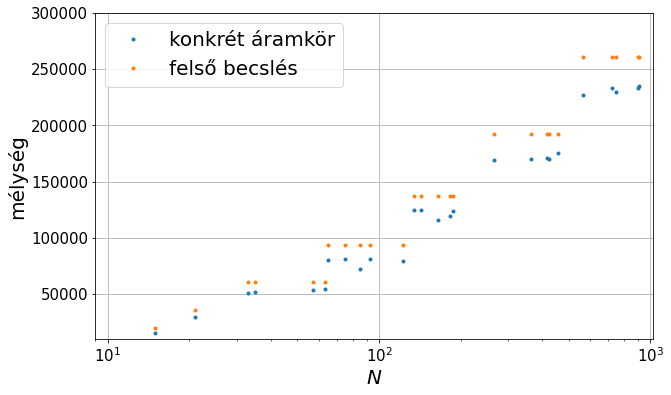

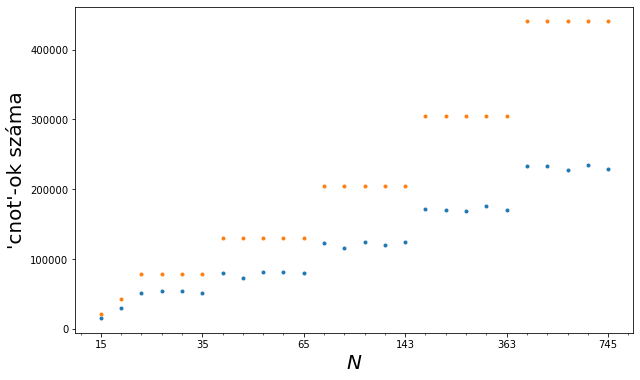

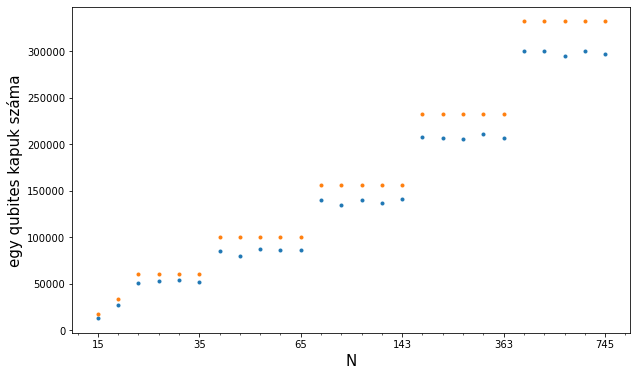

In [29]:
N_max = max(np.array(list(compl['depth'].keys()), dtype=int))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.array(list(compl['depth'].keys()), 
dtype=int), [max(compl['depth'][N]) for N in compl['depth'].keys()], '.', 
label='konkrét áramkör')
ax.plot(np.array(list(compl['depth'].keys()), dtype=int), 
[dep(int(N).bit_length()) for N in compl['depth'].keys()], '.', 
label='felső becslés')
ax.set_xlabel('$N$', fontsize=20)
ax.set_ylabel('mélység', fontsize=20)
ax.grid()
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(fontsize=20)
ax.set_xlim(9, 1024)
ax.set_ylim(10**4, 3*10**5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10))
#ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10))
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_formatter(matplotlib.ticker.LogFormatter(base=10, labelOnlyBase=False))
plt.savefig('mélység1')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(compl['single'].keys(), [max(compl['depth'][N]) for N in compl['single'].keys()], '.')
ax.plot(compl['single'].keys(), [sing(int(N).bit_length()) for N in compl['single'].keys()], '.')
ax.set_ylabel("'cnot'-ok száma", fontsize=20)
ax.set_xlabel('$N$', fontsize=20)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(compl['cnot'].keys(), [max(compl['cnot'][N]) for N in compl['cnot'].keys()], '.')
ax.plot(compl['cnot'].keys(), [cx(int(N).bit_length()) for N in compl['cnot'].keys()], '.')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('egy qubites kapuk száma', fontsize=15)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

In [17]:
n1 = np.array([max(compl['depth'][N]) for N in compl['depth'].keys()])
n2 = np.array([dep(int(np.log2(N))+1) for N in np.array(list(compl['depth'].keys()), dtype=int)])
print(n1/n2)

[0.80018473 0.8071251  0.84213312 0.88871245 0.90237528 0.85857483
 0.8487684  0.77700869 0.87158452 0.86479096 0.85704672 0.90145016
 0.84853525 0.90874475 0.8743289  0.91072887 0.89045969 0.88648587
 0.87937563 0.913304   0.88680835 0.8963688  0.89707124 0.8711193
 0.90082911 0.88081913]


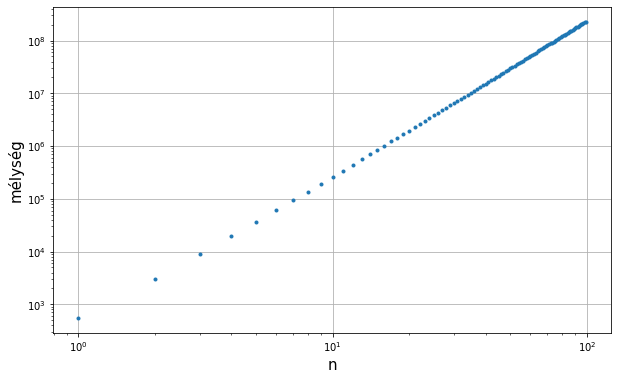

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(100), [dep(n) for n in range(100)], '.')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n', fontsize=15)
ax.set_ylabel('mélység', fontsize=15)
ax.grid()

## futtatások száma

In [19]:
def lin(x, a, b):
    return a*x+b

def log(x, a):
    return(a*np.log2(x))

In [20]:
num = []
E = []
Expect = {}
for N in range(4, 3000):
    if is_prime(N)==False and find_int_pow(N)[1] == 1 and N%2 == 1:
        num.append(N)
        
        i = 0 # itt számláljuk, hogy hány sikeres 'a' van 
        frac = []
        for a in range(2, N-1):
            if gcd(a, N)[1] == 1:
                r = order(a, N)
                j = 0
                for s in range(1, r):
                    if gcd(s, r)[1] == 1:
                        j += 1
                frac.append(r/j)
                if r%2 == 0 and int_pow_mod(a, r//2, N) != N-1:
                    i += 1
            else:
                i += 1
        q = i/(N-3)
        E.append(1/(q*(N-3))*sum(frac))
        Expect[N] = 1/(q*(N-3))*sum(frac)

[0.25227527]


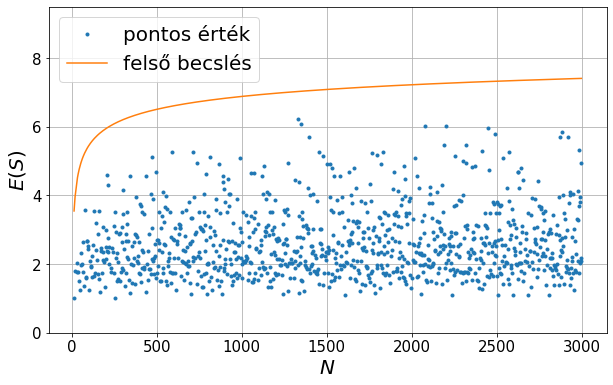

In [23]:
num = np.array(num, dtype = int)
fit, cov = scipy.optimize.curve_fit(log, num, E, p0=[1])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(num, E, '.', label='pontos érték')
ax.plot(num, 2*np.log(np.log(num))*np.exp(np.euler_gamma), label = 'felső becslés')
ax.set_xlabel('$N$', fontsize=20)
ax.set_ylabel('$E(S)$', fontsize=20)
ax.set_ylim(0, 9.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax.set_title('Futtatások számának várható értéke')
ax.grid()
ax.legend(fontsize=20, loc='upper left')
plt.savefig('E(S)')
print(fit)

### futtatások száma hibákkal

In [25]:
def expect(n, p=0): # estimate of expected value of number of runs
    P = (1-p)**(2*n+2)
    return 2*np.log(np.log(2)*n)*np.exp(np.euler_gamma)/P

## Várható időtartam

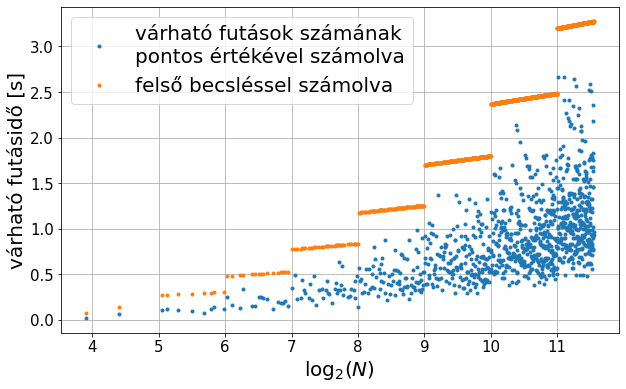

In [48]:
E = np.array(E)
power = 3
n = np.array([int(N).bit_length() for N in num])
x = num
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log2(num), 10**-6*E*dep(n), '.', label='várható futások számának\npontos értékével számolva')
ax.plot(np.log2(x), 10**-6*2*np.log(np.log(x))*np.exp(np.euler_gamma)*np.array([dep(int(N).bit_length()) for N in x]), '.', label='felső becsléssel számolva')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel(r'log$_2(N$)', fontsize=20)
ax.set_ylabel('várható futásidő [s]', fontsize=20)
ax.grid()
ax.legend(loc='best', fontsize=20)
plt.savefig('futásid1')

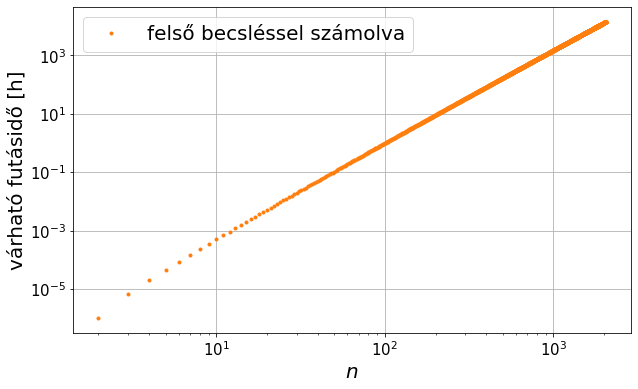

In [26]:
power = 11
n = np.arange(2, 2**power)
n = n.astype('float64')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n, 10**-6*expect(n)*dep(n)/3600, '.', label='felső becsléssel számolva', c='#ff7f0e')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$n$', fontsize=20)
ax.set_ylabel('várható futásidő [h]', fontsize=20)
ax.grid()
plt.legend(fontsize=20)
plt.savefig('futásid2')

In [80]:
n = 2048
10**-6*expect(n)*dep(n)/3600

14320.821219130994

## Áramkör topológiája

In [10]:
def lines(n):
    K = 2*n+1
    return K*(K-1)/2 + K*(2*n+1) + 3*n*(n+1)/2 + n+1
def full(n):
    K = 2*n+1
    nodes = K + 2*n + 2
    return nodes*(nodes-1)/2

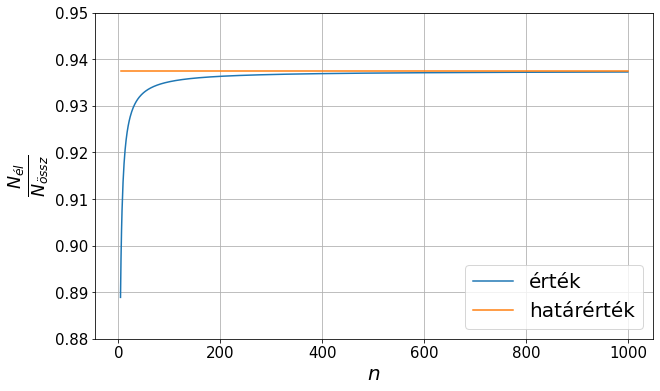

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(4, 1000)
ax.plot(x, lines(x)/full(x), label='érték')
ax.plot(x, [15/16]*len(x), label='határérték')
ax.set_ylim(0.88,0.95)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('$n$', fontsize=20)
ax.set_ylabel(r'$\frac{N_{él}}{N_{össz}}$', fontsize=25)
ax.grid()
plt.legend(fontsize=20, loc='lower right')
plt.savefig('összeköt')